### 1. Importing the Libraries

In [3]:
import pandas as pd

### 2. Importing the Dataset

In [5]:
pwd

'C:\\Users\\biswa\\Downloads'

In [8]:
data = pd.read_csv('heart.csv')

### 3. Taking Care of Missing Values

In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 4. Taking Care of Duplicate Values

In [10]:
data_dup = data.duplicated().any()

In [11]:
data_dup

True

In [12]:
data = data.drop_duplicates()

In [13]:
data_dup = data.duplicated().any()

In [14]:
data_dup

False

### 5. Data Processing

In [15]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [16]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [17]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### 6. Encoding Categorical Data

In [18]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [19]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [20]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

In [21]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


### 7. Feature Scaling

In [22]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [25]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


### 8. Splitting The Dataset Into The Training Set And Test Set

In [26]:
X = data.drop('target',axis=1)

In [33]:
y = data['target']

In [31]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42)

In [35]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

### 9. Logistic Regression

In [36]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [27]:
from sklearn.linear_model import LogisticRegression

In [37]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [38]:
y_pred1 = log.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

### 10.KNN Classifier Method

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier()

In [44]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [47]:
import numpy as np
X_test = np.array(X_test)

In [48]:
y_pred3=knn.predict(X_test)

C:\Users\biswa\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [49]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [54]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [42]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [56]:
import matplotlib.pyplot as plt

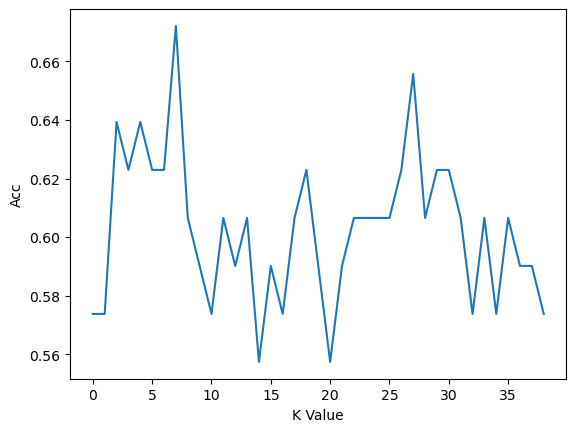

In [57]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [58]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.5737704918032787

### Non-Linear ML Algorithms

In [50]:
data = pd.read_csv('heart.csv')

In [51]:
data = data.drop_duplicates()

In [59]:
X = data.drop('target',axis=1)
y=data['target']

In [60]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=42)

### 11. Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt = DecisionTreeClassifier()

In [63]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [64]:
y_pred4= dt.predict(X_test)

In [65]:
accuracy_score(y_test,y_pred4)

0.7213114754098361

### 12. Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf = RandomForestClassifier()

In [68]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [70]:
y_pred5= rf.predict(X_test)

In [71]:
accuracy_score(y_test,y_pred5)

0.8524590163934426

### 13. Gradient Boosting Classifier

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

In [73]:
gbc = GradientBoostingClassifier()

In [74]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [76]:
y_pred6 = gbc.predict(X_test)

In [79]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [81]:
final_data = pd.DataFrame({'Models':['LR','KNN','DT','RF','GB'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100,
                                accuracy_score(y_test,y_pred6)*100]})


In [82]:
final_data

,Models,ACC
0,LR,78.688525
1,KNN,73.770492
2,DT,72.131148
3,RF,85.245902
4,GB,80.327869


In [83]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

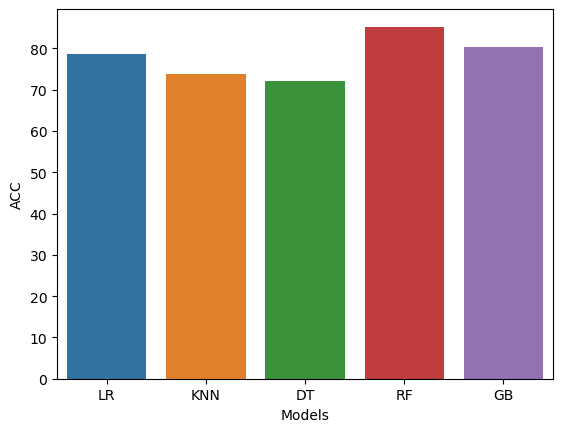

In [85]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'])

In [86]:
X=data.drop('target',axis=1)
y=data['target']

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

### 14. Prediction on New Data

In [89]:
import pandas as pd

In [90]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
     'slope':2,
    'ca':2,
    'thal':3,    
},index=[0])

In [92]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [93]:
p = rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease
